In [183]:
%run geometria.ipynb

In [184]:
Tolerance = 10e-12

# Funkcje pomocnicze

In [218]:
# określanie położenia punktu c względem odcinka ab
def det(a, b, c):
    return a[0] * b[1] + b[0] * c[1] + a[1] * c[0] - c[0] * b[1] - b[0] * a[1] - a[0] * c[1]

def orient(a, b, c):
    determinant = det(a, b, c)
    if determinant > Tolerance: # lewa strona
        return 1
    elif determinant < -Tolerance: # prawa strona
        return -1
    else: # współliniowe
        return 0
    
# do wizualizacji algorytmu
def get_lines(hull):
    lines = []
    for i in range(len(hull)-1):
        lines.append((hull[i], hull[i+1]))
    return lines

def add_scene(lower, upper, points, scenes):
    upper_lines = get_lines(upper)
    lower_lines = get_lines(lower)
    scenes.append(Scene(points=[PointsCollection(deepcopy(points), color="pink"),
                                PointsCollection(deepcopy(upper), color="hotpink"),
                                PointsCollection(deepcopy(lower), color="teal")],
                        lines=[LinesCollection(deepcopy(upper_lines), color="hotpink"),
                               LinesCollection(deepcopy(lower_lines), color="teal")]))

# Główny algorytm

In [227]:
def UpperAndLower(points):
    if len(points) < 3: return points
    sorted_points = sorted(points, key=lambda x: (x[0], x[1]))
    scenes = [Scene(points=[PointsCollection(deepcopy(points), color="pink")])]

    upper, lower = [sorted_points[0], sorted_points[1]], [sorted_points[0], sorted_points[1]]

    for idx in range(2, len(sorted_points)):
        
        add_scene(lower, upper, points, scenes)
        
        while len(upper) > 1 and orient(upper[-2], upper[-1], sorted_points[idx]) != -1:
            upper.pop()
        upper.append(sorted_points[idx])     

        while len(lower) > 1 and orient(lower[-2], lower[-1], sorted_points[idx]) != 1:
            lower.pop()
        lower.append(sorted_points[idx])

    
    lower.reverse()
    add_scene(lower, upper, points, scenes)
    upper.pop()
    lower.pop()
    hull = upper + lower
    
    
    print("Number of points in hull: " + str(len(hull)))
    print("Number of points in lower hull: " + str(len(lower)))
    print("Number of points in upper hull: " + str(len(upper)))
    
    return scenes
        

# Testy

Number of points in hull: 11
Number of points in lower hull: 6
Number of points in upper hull: 5


<IPython.core.display.Javascript object>


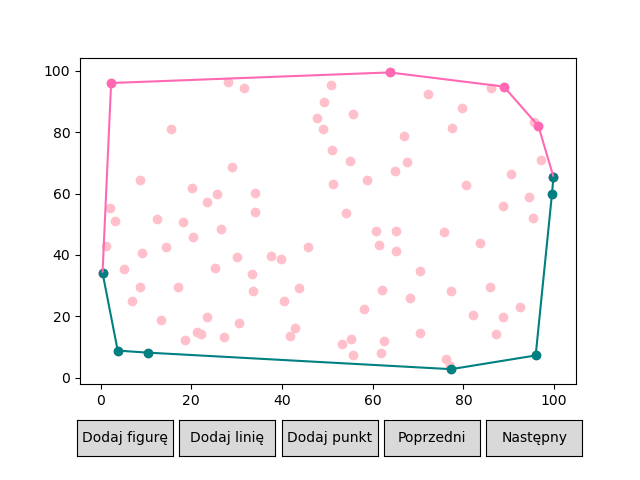

In [228]:
def generate_points(amount, low, high):
    a = np.random.rand(amount).astype(np.float64) * (high - low) + low
    b = np.random.rand(amount).astype(np.float64) * (high - low) + low
    return list(zip(a, b))

data = generate_points(100, 0, 100)
scenes = UpperAndLower(data)
plot = Plot(scenes=scenes)
plot.draw()